WeatherPy
   
Note:
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Confirm API key was accepted

#weather_api_key

Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
#Working with a loop
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set up lists to hold response info
nameofcity = []
lat1 = []
lng1 = []
maxT = []
hum = []
wind_spd = []
country = []
date = []
clouds = []
counter = 0
sets = 1

# Loop through the list of cities set by previous loop and perform a request for data on each []
print("-------Beginning of Data Retrieval--------")

for city in cities:
    city=city
    
    query_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {counter} of Set {sets} | {city}")
        nameofcity.append(response['name'])
        lat1.append(response['coord']['lat'])
        lng1.append(response['coord']['lon'])
        maxT.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        clouds.append(response['clouds']['all'])

    except: 
        print('City not found. Skipping...')
        lat1.append(np.nan)
        lng1.append(np.nan)
        maxT.append(np.nan)
        hum.append(np.nan)
        wind_spd.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        clouds.append(np.nan)
        
    counter = counter + 1
    if counter == 50:
        counter = 0
        sets = sets + 1

print("-----------------------")      
print("Data Retrieval Complete")
print("-----------------------") 

-------Beginning of Data Retrieval--------
Processing Record 0 of Set 1 | port elizabeth
Processing Record 1 of Set 1 | vanimo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | apango
Processing Record 7 of Set 1 | carutapera
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | shieli
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | dergachi
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | morant bay
Processing Record 15 of Set 1 | manggar
Processing Record 16 of Set 1 | patnanungan
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | sinop
Processing Record 21 of Set 1 | santander
Processing Record 22 of Set 1 | naze
Processing Record 23 of Set 1 | c

Processing Record 38 of Set 4 | muros
Processing Record 39 of Set 4 | dabakala
Processing Record 40 of Set 4 | pyaozerskiy
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | popondetta
Processing Record 43 of Set 4 | den helder
Processing Record 44 of Set 4 | te anau
Processing Record 45 of Set 4 | ewa beach
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | sal rei
Processing Record 49 of Set 4 | manado
Processing Record 0 of Set 5 | avera
Processing Record 1 of Set 5 | florianopolis
Processing Record 2 of Set 5 | skagastrond
City not found. Skipping...
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | vanavara
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | chagda
City not found. Skipping...
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | namatanai
Processing Record 9 of Set 5 | half moon bay
Processing Record 10 of Set 5 | batagay-alyta
Pr

Processing Record 27 of Set 8 | linfen
Processing Record 28 of Set 8 | buchanan
Processing Record 29 of Set 8 | ganzhou
Processing Record 30 of Set 8 | joao camara
Processing Record 31 of Set 8 | penzance
Processing Record 32 of Set 8 | markova
Processing Record 33 of Set 8 | kijang
Processing Record 34 of Set 8 | vernon
Processing Record 35 of Set 8 | suditi
Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | skjervoy
Processing Record 39 of Set 8 | rocha
Processing Record 40 of Set 8 | santa luzia
Processing Record 41 of Set 8 | constitucion
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | teguldet
Processing Record 46 of Set 8 | norden
Processing Record 47 of Set 8 | palmer
Processing Record 48 of Set 8 | tinaquillo
Processing Record 49 of Set 8 | port-gentil
Processing Record 0 of Set 9 | colac
Processing Record 1 of Set 

Processing Record 16 of Set 12 | saint anthony
Processing Record 17 of Set 12 | leh
Processing Record 18 of Set 12 | broome
Processing Record 19 of Set 12 | milkovo
Processing Record 20 of Set 12 | jvari
Processing Record 21 of Set 12 | ancud
Processing Record 22 of Set 12 | dedougou
Processing Record 23 of Set 12 | banavar
Processing Record 24 of Set 12 | ndele
Processing Record 25 of Set 12 | barawe
City not found. Skipping...
Processing Record 26 of Set 12 | murgud
Processing Record 27 of Set 12 | dublin
Processing Record 28 of Set 12 | rudbar
Processing Record 29 of Set 12 | comodoro rivadavia
Processing Record 30 of Set 12 | natalinsk
Processing Record 31 of Set 12 | oriximina
Processing Record 32 of Set 12 | filingue
Processing Record 33 of Set 12 | malampaka
Processing Record 34 of Set 12 | lyuban
Processing Record 35 of Set 12 | ipixuna
Processing Record 36 of Set 12 | foz do iguacu
Processing Record 37 of Set 12 | show low
Processing Record 38 of Set 12 | ust-nera
Processing R

Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [6]:
#Create  a data frame from all lists

w_dict = {
    "City": cities,
    "Lat": lat1,
    "Lng": lng1,
    "Max Temp": maxT,
    "Humidity": hum,
    "Cloudiness": clouds,
    "Country": country,
    "Wind Speed": wind_spd,
    "Date": date
}

w_data = pd.DataFrame(w_dict)
w_data.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness Country  \
0  port elizabeth -33.9180   25.5701     75.20      57.0         0.0      ZA   
1          vanimo  -2.6741  141.3028     79.59      85.0       100.0      PG   
2         ushuaia -54.8000  -68.3000     39.20      81.0        40.0      AR   
3       jamestown  42.0970  -79.2353     18.00      79.0        90.0      US   
4          hobart -42.8794  147.3294     62.60      88.0        90.0      AU   

   Wind Speed          Date  
0       14.97  1.611929e+09  
1       10.27  1.611929e+09  
2       19.57  1.611929e+09  
3       10.36  1.611929e+09  
4        9.22  1.611929e+09

In [7]:
weather_drop = w_data.dropna()
weather_drop.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness Country  \
0  port elizabeth -33.9180   25.5701     75.20      57.0         0.0      ZA   
1          vanimo  -2.6741  141.3028     79.59      85.0       100.0      PG   
2         ushuaia -54.8000  -68.3000     39.20      81.0        40.0      AR   
3       jamestown  42.0970  -79.2353     18.00      79.0        90.0      US   
4          hobart -42.8794  147.3294     62.60      88.0        90.0      AU   

   Wind Speed          Date  
0       14.97  1.611929e+09  
1       10.27  1.611929e+09  
2       19.57  1.611929e+09  
3       10.36  1.611929e+09  
4        9.22  1.611929e+09

In [8]:
#Export the city data into a .csv.
weather_drop.to_csv(r'../output_data/city_weather_data.csv', index=False)

In [9]:
#Read into export csv file
file_path = "../output_data/city_weather_data.csv"
city_weather = pd.read_csv(file_path)
city_weather

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    port elizabeth -33.9180   25.5701     75.20      57.0         0.0   
1            vanimo  -2.6741  141.3028     79.59      85.0       100.0   
2           ushuaia -54.8000  -68.3000     39.20      81.0        40.0   
3         jamestown  42.0970  -79.2353     18.00      79.0        90.0   
4            hobart -42.8794  147.3294     62.60      88.0        90.0   
..              ...      ...       ...       ...       ...         ...   
577      eydhafushi   5.1033   73.0708     80.91      72.0        46.0   
578        manicore  -5.8092  -61.3003     76.26      93.0        98.0   
579       nang rong  14.6377  102.7914     81.00      51.0        84.0   
580           lagoa  39.0500  -27.9833     59.16      71.0       100.0   
581        denpasar  -8.6500  115.2167     78.80      89.0        75.0   

    Country  Wind Speed          Date  
0        ZA       14.97  1.611929e+09  
1        PG       10.27  1.611929e+09  
2        AR       19.57  1.611929e+09  
3        US       10.36  1.611929e+09  
4        AU        9.22  1.611929e+09  
..      ...         ...           ...  
577      MV       12.75  1.611930e+09  
578      BR        2.82  1.611930e+09  
579      TH        6.91  1.611930e+09  
580      PT       22.39  1.611930e+09  
581      ID       11.50  1.611929e+09  

[582 rows x 9 columns]

Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [10]:
#Check data to see if cities have humidity >100

# city_weather['Humidity'].max()
# city_weather['Humidity'].describe()
# city_weather['Humidity'] > 100.0

Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

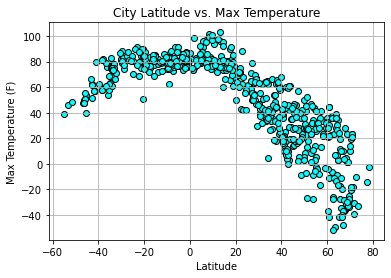

Analysis of cities latitude and the maximum temperature of those cities. Latitude is a main factor   affecting temperature, therefore the further a city is from the equator, the lower the temperature.


In [11]:
x_axis = city_weather['Lat']
y_axis = city_weather['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="cyan", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatVSMaxT.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and the maximum temperature of those cities. Latitude is a main factor   affecting temperature, therefore the further a city is from the equator, the lower the temperature.")

Latitude vs. Humidity Plot

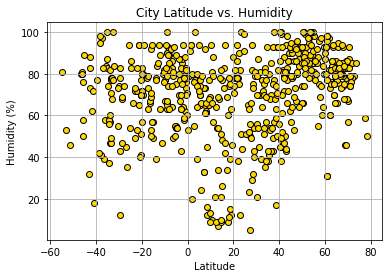

Analysis of cities latitude and percent humidity of those cities. Humidity appears to have some dependency on latitude, however there are lower humidity values near the equator. This could due to seasonal effects.


In [12]:
x_axis = city_weather['Lat']
y_axis = city_weather['Humidity']
plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatVSHumidity.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and percent humidity of those cities. Humidity appears to have some dependency on latitude, however there are lower humidity values near the equator. This could due to seasonal effects.")

Latitude vs. Cloudiness Plot

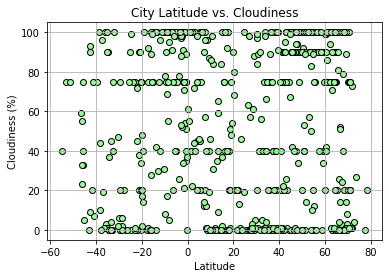

Analysis of cities latitude and the percent cloudiness of those cities. Data points are largely      distributed, it doesn't appear that latitude and cloudiness have a direct relationship.


In [13]:
x_axis = city_weather['Lat']
y_axis = city_weather['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", facecolors="palegreen", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatVSCloudiness.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and the percent cloudiness of those cities. Data points are largely      distributed, it doesn't appear that latitude and cloudiness have a direct relationship.")

Latitude vs. Wind Speed Plot

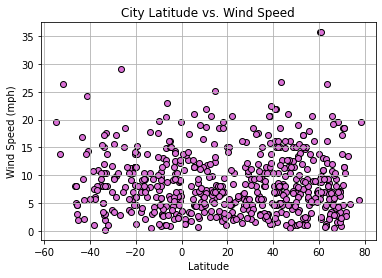

Analysis of cities latitude and wind speed of those cities. Most of the cities are located in a      region with wind speeds below 20mph as lower wind speeds are more concentrated near the equator.


In [14]:
x_axis = city_weather['Lat']
y_axis = city_weather['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", facecolors="orchid", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/LatVSWindSpeed.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and wind speed of those cities. Most of the cities are located in a      region with wind speeds below 20mph as lower wind speeds are more concentrated near the equator.")

Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#Need to filter data to include only northern hemisphere
#Latitude for northern hemisphere?
#0 degress at the equator and end at 90 degress at the North Poles
#Apply filter to include ALL columns within the city_weather data frame

nhem = city_weather.loc[city_weather['Lat'] >= 0, :]
nhem

City      Lat       Lng  Max Temp  Humidity  Cloudiness Country  \
3      jamestown  42.0970  -79.2353     18.00      79.0        90.0      US   
6         apango  17.7333  -99.3333     66.00      60.0       100.0      MX   
8       hamilton  39.1834  -84.5333     23.00      93.0         1.0      US   
9           hilo  19.7297 -155.0900     68.00      88.0        90.0      US   
10        shieli  44.1667   66.7500     29.08      90.0         0.0      KZ   
..           ...      ...       ...       ...       ...         ...     ...   
575  belaya gora  68.5333  146.4167    -29.79      84.0       100.0      RU   
576     savelugu   9.6244   -0.8253    100.53      13.0         0.0      GH   
577   eydhafushi   5.1033   73.0708     80.91      72.0        46.0      MV   
579    nang rong  14.6377  102.7914     81.00      51.0        84.0      TH   
580        lagoa  39.0500  -27.9833     59.16      71.0       100.0      PT   

     Wind Speed          Date  
3         10.36  1.611929e+09  
6          1.68  1.611929e+09  
8          1.59  1.611929e+09  
9         14.97  1.611929e+09  
10         8.48  1.611929e+09  
..          ...           ...  
575        4.25  1.611930e+09  
576        6.15  1.611930e+09  
577       12.75  1.611930e+09  
579        6.91  1.611930e+09  
580       22.39  1.611930e+09  

[395 rows x 9 columns]

The r-squared is: 0.7355459985232428


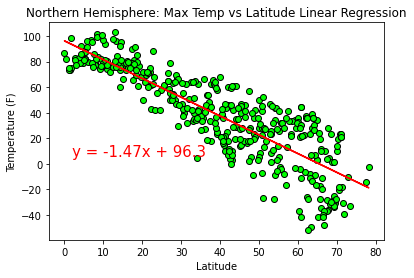

In [16]:
x_axis = nhem['Lat']
y_axis = nhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="lime", edgecolors="black")
plt.title("Northern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(2,6),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemMaxTvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
#Southern hemisphere anything >0 degrees lat
shem = city_weather.loc[city_weather['Lat'] < 0, :]
shem

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    port elizabeth -33.9180   25.5701     75.20      57.0         0.0   
1            vanimo  -2.6741  141.3028     79.59      85.0       100.0   
2           ushuaia -54.8000  -68.3000     39.20      81.0        40.0   
4            hobart -42.8794  147.3294     62.60      88.0        90.0   
5              lebu -37.6167  -73.6500     59.31      97.0        96.0   
..              ...      ...       ...       ...       ...         ...   
570       ulladulla -35.3500  150.4667     69.01     100.0        90.0   
573        necochea -38.5473  -58.7368     81.00      42.0       100.0   
574      oudtshoorn -33.5907   22.2014     73.40      49.0         0.0   
578        manicore  -5.8092  -61.3003     76.26      93.0        98.0   
581        denpasar  -8.6500  115.2167     78.80      89.0        75.0   

    Country  Wind Speed          Date  
0        ZA       14.97  1.611929e+09  
1        PG       10.27  1.611929e+09  
2        AR       19.57  1.611929e+09  
4        AU        9.22  1.611929e+09  
5        CL        6.13  1.611929e+09  
..      ...         ...           ...  
570      AU       10.36  1.611930e+09  
573      AR       10.80  1.611930e+09  
574      ZA        8.05  1.611930e+09  
578      BR        2.82  1.611930e+09  
581      ID       11.50  1.611929e+09  

[187 rows x 9 columns]

The r-squared is: 0.4396149828192429


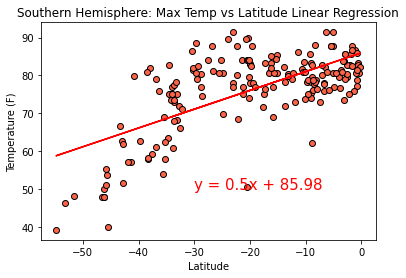

In [18]:
x_axis = shem['Lat']
y_axis = shem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="tomato", edgecolors="black")
plt.title("Southern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, xy=(-30, 50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemMaxTvsLatLinearRegression.png")
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15479309403736766


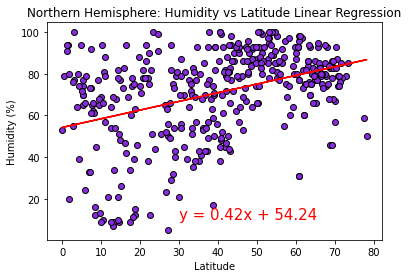

In [19]:
x_axis = nhem['Lat']
y_axis = nhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="blueviolet", edgecolors="black")
plt.title("Northern Hemisphere: Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemMHumidityvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025740273750108008


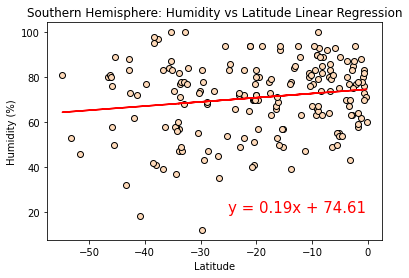

In [20]:
x_axis = shem['Lat']
y_axis = shem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="peachpuff", edgecolors="black")
plt.title("Southern Hemisphere: Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,xy=(-25, 20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemHumvsLatLinearRegression.png")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.032400721613694054


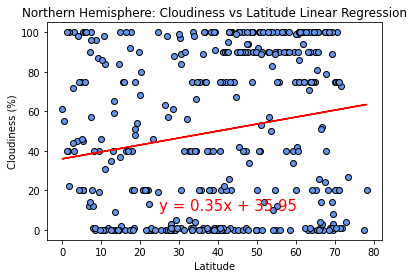

In [21]:
x_axis = nhem['Lat']
y_axis = nhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title("Northern Hemisphere: Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemCloudsvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15090569273030338


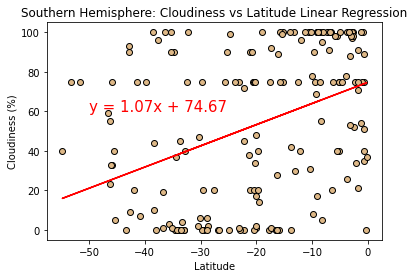

In [22]:
x_axis = shem['Lat']
y_axis = shem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="burlywood", edgecolors="black")
plt.title("Southern Hemisphere: Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,xy=(-50, 60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemCloudsvsLatLinearRegression.png")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016229940343092286


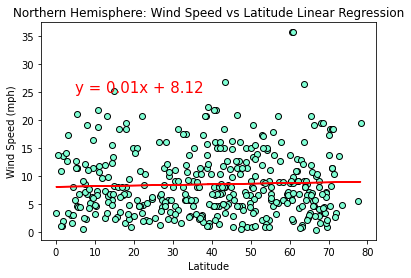

In [23]:
x_axis = nhem['Lat']
y_axis = nhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="aquamarine", edgecolors="black")
plt.title("Northern Hemisphere: Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemWindSpdvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008792401986341953


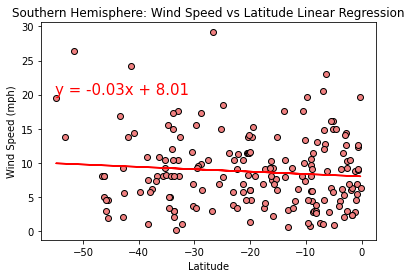

In [24]:
x_axis = shem['Lat']
y_axis = shem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", edgecolors="black")
plt.title("Southern Hemisphere: Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,xy=(-55, 20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemWindSpdvsLatLinearRegression.png")
plt.show()